### Kaggle : https://www.kaggle.com/code/brightezeoha/us-accidents-data-analysis

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [3]:
df = pd.read_csv("data2/US_Accidents_Dec21_updated.csv")
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [8]:
us_accidents = df
us_accidents.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
us_accidents.shape

(2845342, 47)

In [10]:
us_accidents.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [11]:
us_accidents.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [12]:
us_accidents.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [13]:
missing_data = us_accidents.isna().sum(axis=0).sort_values(ascending=True)
missing_data = missing_data.to_frame()
missing_data.columns = ['missing_count']
missing_data = missing_data.loc[missing_data['missing_count']>0]

missing_data

,missing_count
Street,2
City,137
Zipcode,1319
Civil_Twilight,2867
Sunrise_Sunset,2867
Astronomical_Twilight,2867
Nautical_Twilight,2867
Timezone,3659
Airport_Code,9549
Weather_Timestamp,50736


In [14]:
cities = us_accidents['City'].unique()
len(cities)

11682

In [15]:
accidents_by_cities = us_accidents['City'].value_counts()
accidents_by_cities

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [16]:
accidents_by_cities[:10]

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Charlotte       33152
Sacramento      32559
San Diego       26627
Raleigh         22840
Minneapolis     22768
Name: City, dtype: int64

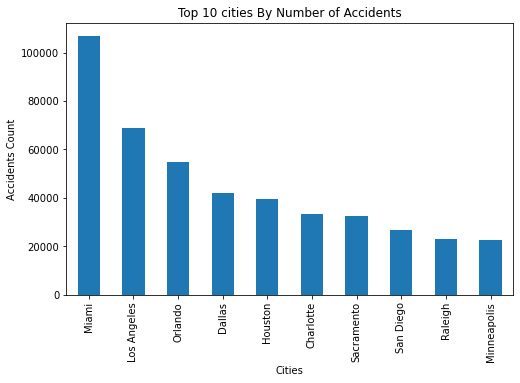

In [17]:
fig, ax = plt.subplots(figsize=(8,5))
accidents_by_cities[:10].plot(kind='bar')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

In [19]:
accidents_severity = us_accidents.groupby('Severity').count()['ID']
accidents_severity

Severity
1      26053
2    2532991
3     155105
4     131193
Name: ID, dtype: int64

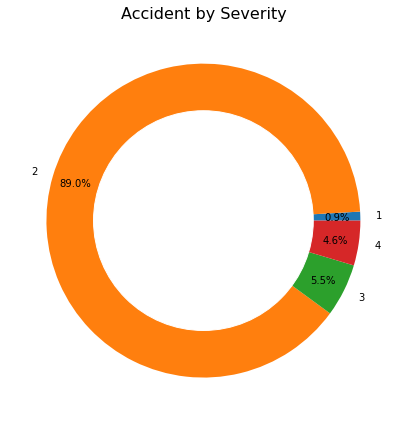

In [20]:
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
label = [1,2,3,4]
plt.pie(accidents_severity, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident by Severity",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

In [21]:
us_accidents['Start_Time'].dtypes

dtype('O')

In [22]:
us_accidents['End_Time'].dtypes

dtype('O')

In [23]:
us_accidents = us_accidents.astype({'Start_Time': 'datetime64[ns]', 'End_Time': 'datetime64[ns]'})
us_accidents['Start_Time'].dtypes

dtype('<M8[ns]')

In [24]:
us_accidents['Start_Time'][0]

Timestamp('2016-02-08 00:37:08')

Text(0.5, 1.0, 'Accidents Count By Time of Day')

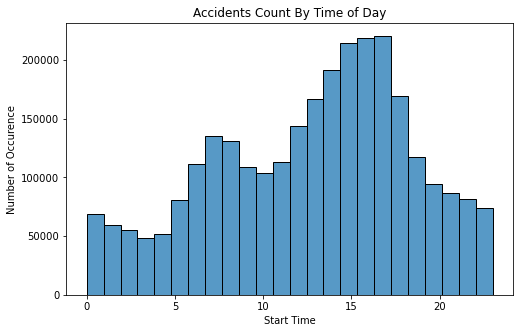

In [25]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(us_accidents['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

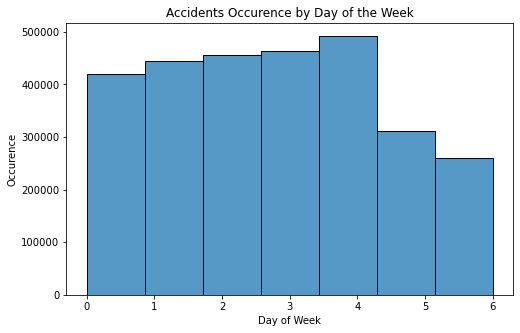

In [26]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(us_accidents['Start_Time'].dt.dayofweek, bins = 7)

plt.xlabel("Day of Week")
plt.ylabel("Occurence")
plt.title('Accidents Occurence by Day of the Week')

plt.show()

In [27]:
saturday = us_accidents[us_accidents['Start_Time'].dt.dayofweek == 5]
sunday = us_accidents[us_accidents['Start_Time'].dt.dayofweek == 6]

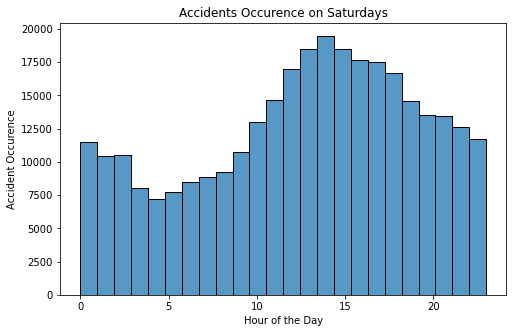

In [28]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(saturday['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Hour of the Day")
plt.ylabel("Accident Occurence")
plt.title('Accidents Occurence on Saturdays')

plt.show()

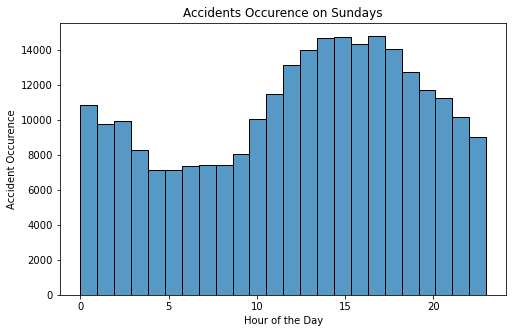

In [29]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(sunday['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Hour of the Day")
plt.ylabel("Accident Occurence")
plt.title('Accidents Occurence on Sundays')

plt.show()

In [30]:
import random

In [31]:
weekdays_in_numbers = [0,1,2,3,4]
random_num = random.choice(weekdays_in_numbers)
random_num

1

In [32]:
tuesday = us_accidents[us_accidents['Start_Time'].dt.dayofweek == 1]

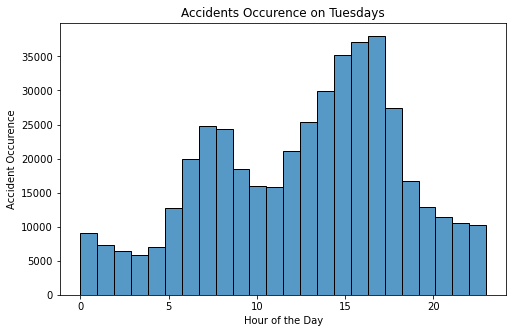

In [33]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(tuesday['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Hour of the Day")
plt.ylabel("Accident Occurence")
plt.title('Accidents Occurence on Tuesdays')

plt.show()

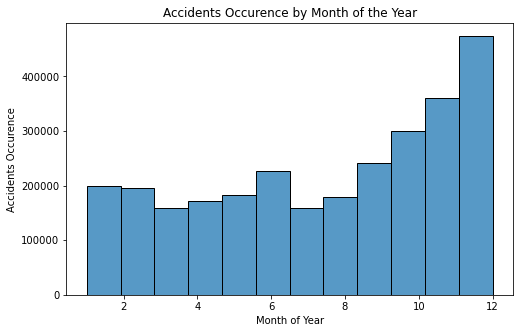

In [34]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(us_accidents['Start_Time'].dt.month, bins = 12)

plt.xlabel("Month of Year")
plt.ylabel("Accidents Occurence")
plt.title('Accidents Occurence by Month of the Year')

plt.show()

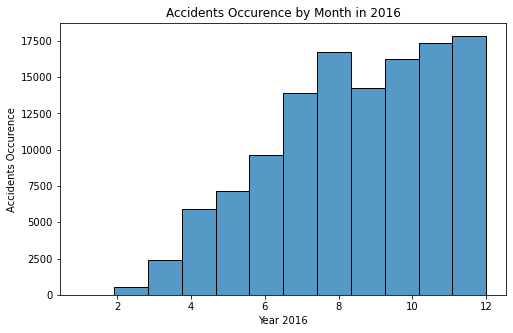

In [35]:
fig, ax = plt.subplots(figsize=(8,5))
dt_2016 = us_accidents[us_accidents['Start_Time'].dt.year==2016]
sns.histplot(dt_2016['Start_Time'].dt.month, bins = 12)

plt.xlabel("Year 2016")
plt.ylabel("Accidents Occurence")
plt.title('Accidents Occurence by Month in 2016')

plt.show()

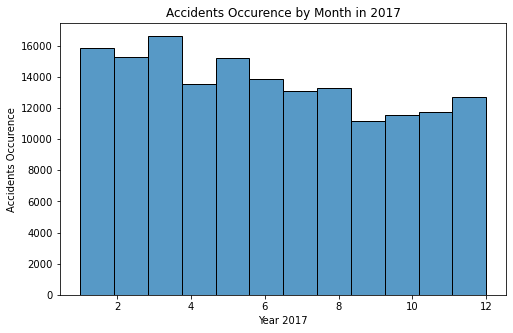

In [36]:
fig, ax = plt.subplots(figsize=(8,5))
dt_2017 = us_accidents[us_accidents['Start_Time'].dt.year==2017]
sns.histplot(dt_2017['Start_Time'].dt.month, bins = 12)

plt.xlabel("Year 2017")
plt.ylabel("Accidents Occurence")
plt.title('Accidents Occurence by Month in 2017')

plt.show()

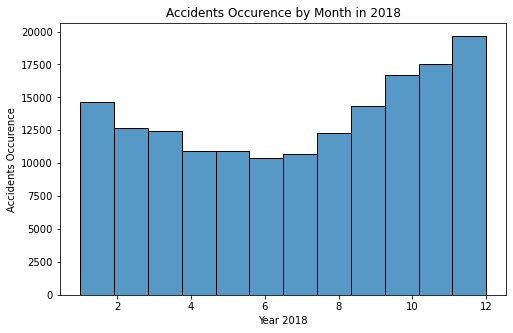

In [37]:
fig, ax = plt.subplots(figsize=(8,5))
dt_2018 = us_accidents[us_accidents['Start_Time'].dt.year==2018]
sns.histplot(dt_2018['Start_Time'].dt.month, bins = 12)

plt.xlabel("Year 2018")
plt.ylabel("Accidents Occurence")
plt.title('Accidents Occurence by Month in 2018')

plt.show()

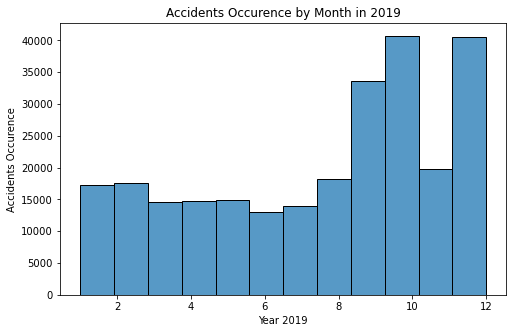

In [38]:
fig, ax = plt.subplots(figsize=(8,5))
dt_2019 = us_accidents[us_accidents['Start_Time'].dt.year==2019]
sns.histplot(dt_2019['Start_Time'].dt.month, bins = 12)

plt.xlabel("Year 2019")
plt.ylabel("Accidents Occurence")
plt.title('Accidents Occurence by Month in 2019')

plt.show()

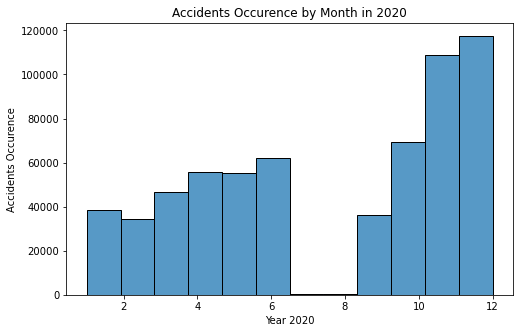

In [39]:
fig, ax = plt.subplots(figsize=(8,5))
dt_2020 = us_accidents[us_accidents['Start_Time'].dt.year==2020]
sns.histplot(dt_2020['Start_Time'].dt.month, bins = 12)

plt.xlabel("Year 2020")
plt.ylabel("Accidents Occurence")
plt.title('Accidents Occurence by Month in 2020')

plt.show()

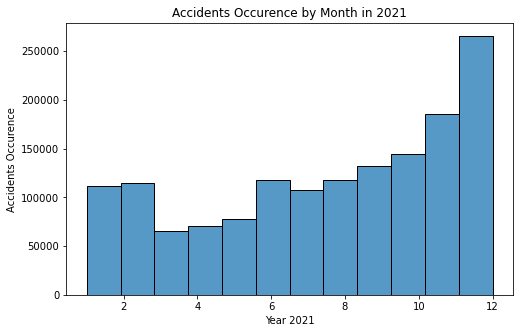

In [48]:
fig, ax = plt.subplots(figsize=(8,5))
dt_2020 = us_accidents[us_accidents['Start_Time'].dt.year==2021]
sns.histplot(dt_2020['Start_Time'].dt.month, bins = 12)

plt.xlabel("Year 2021")
plt.ylabel("Accidents Occurence")
plt.title('Accidents Occurence by Month in 2021')

plt.show()

In [43]:
# 왼쪽과 오른쪽 사이드 중 어떤 사이드에서 사고가 더 많이 발생했는가?

side_of_road =  us_accidents.groupby(['Side']).count()['ID']
side_of_road

Side
L     492032
N          1
R    2353309
Name: ID, dtype: int64

In [ ]:
# 이거 왜 안돼 젠장

ValueError: 'label' must be of length 'x'

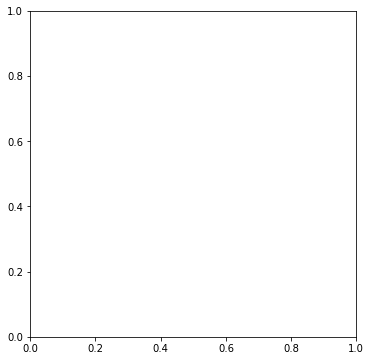

In [42]:
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
label = ['Left', 'Right']
plt.pie(side_of_road, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident Occurence by Side of Road",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

In [44]:
weather_conditions = us_accidents.groupby(['Weather_Condition']).count()['ID']
weather_conditions

Weather_Condition
Blowing Dust                142
Blowing Dust / Windy        148
Blowing Sand                  1
Blowing Snow                162
Blowing Snow / Windy         86
                           ... 
Volcanic Ash                  4
Widespread Dust              50
Widespread Dust / Windy      18
Wintry Mix                 3843
Wintry Mix / Windy           74
Name: ID, Length: 127, dtype: int64

In [45]:
weather_conditions.sort_values(ascending=False)

Weather_Condition
Fair                         1107194
Mostly Cloudy                 363959
Cloudy                        348767
Partly Cloudy                 249939
Clear                         173823
                              ...   
Low Drifting Snow                  1
Light Fog                          1
Mist / Windy                       1
Sand / Dust Whirls Nearby          1
Sleet / Windy                      1
Name: ID, Length: 127, dtype: int64

In [46]:
weather_conditions.sort_values(ascending=False)[:20]

Weather_Condition
Fair                       1107194
Mostly Cloudy               363959
Cloudy                      348767
Partly Cloudy               249939
Clear                       173823
Light Rain                  128403
Overcast                     84882
Scattered Clouds             45132
Light Snow                   43752
Fog                          41226
Haze                         36354
Rain                         31044
Fair / Windy                 15195
Heavy Rain                   11824
Smoke                         7200
Light Drizzle                 7041
Thunder in the Vicinity       6944
Cloudy / Windy                6839
T-Storm                       6546
Mostly Cloudy / Windy         6297
Name: ID, dtype: int64

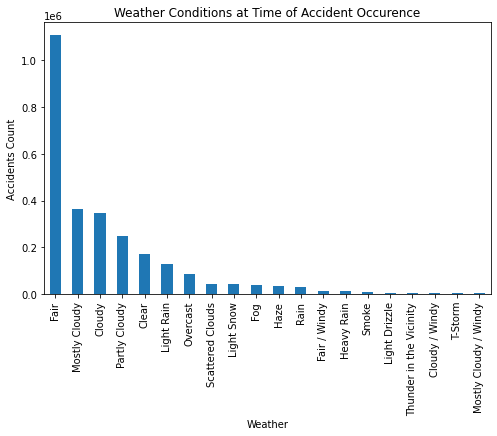

In [47]:
fig, ax = plt.subplots(figsize=(8,5))
weather_conditions.sort_values(ascending=False)[:20].plot(kind='bar')
ax.set(title = 'Weather Conditions at Time of Accident Occurence',
       xlabel = 'Weather',
       ylabel = 'Accidents Count')
plt.show()